In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [3]:
fraud=pd.read_csv('Big_Black_Money_Dataset.csv',index_col=0)
fraud.head()

,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
Transaction ID,,,,,,,,,,,,,
TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TX0000000001 to TX0000010000
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      10000 non-null  object 
 1   Amount (USD)                 10000 non-null  float64
 2   Transaction Type             10000 non-null  object 
 3   Date of Transaction          10000 non-null  object 
 4   Person Involved              10000 non-null  object 
 5   Industry                     10000 non-null  object 
 6   Destination Country          10000 non-null  object 
 7   Reported by Authority        10000 non-null  bool   
 8   Source of Money              10000 non-null  object 
 9   Money Laundering Risk Score  10000 non-null  int64  
 10  Shell Companies Involved     10000 non-null  int64  
 11  Financial Institution        10000 non-null  object 
 12  Tax Haven Country            10000 non-null  object 
dtypes: 

In [5]:
## what percentage of missing value or null value exist in each column,How would you handle these missing values?
missing_values = fraud.isnull().mean()*100
missing_values

Country                        0.0
Amount (USD)                   0.0
Transaction Type               0.0
Date of Transaction            0.0
Person Involved                0.0
Industry                       0.0
Destination Country            0.0
Reported by Authority          0.0
Source of Money                0.0
Money Laundering Risk Score    0.0
Shell Companies Involved       0.0
Financial Institution          0.0
Tax Haven Country              0.0
dtype: float64

In [6]:
##Perform a summary of basic statistics (mean,median,standard deviation,min,and max) for the Amount(USD)column.Identify any extreme outliers
#using z-scores or IQR methods
round(fraud['Amount (USD)'].mean(),2)

np.float64(2501817.66)

In [7]:
round(fraud['Amount (USD)'].median(),2)

np.float64(2501310.4)

In [8]:
round(fraud['Amount (USD)'].min(),2)

np.float64(10031.8)

In [9]:
round(fraud['Amount (USD)'].max(),2)

np.float64(4999812.41)

In [10]:
# TO identify extreme outlier in Amount (USD) column i will have to do the following
z_score=np.abs((fraud['Amount (USD)']-fraud['Amount (USD)'].mean())/fraud['Amount (USD)'].std())



In [11]:
## identified outlier is 
extreme_outlier=fraud[z_score>3]
extreme_outlier.head()
## however there is no extreme outlier in Amount (USD) column

,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
Transaction ID,,,,,,,,,,,,,


In [12]:
## How many unique values are present in the Country and Destination Country columns?Are there any discrepancies(e.g spelling inconsistency)?
fraud['Country'].nunique()

10

In [13]:
fraud['Destination Country'].nunique()

10

In [14]:
## to check for spelling inconsistency we have to convert to lowercase and remove leading/trailing whitespace
fraud['Country']=fraud['Country'].str.lower().str.strip()


In [15]:
fraud['Destination Country']=fraud['Destination Country'].str.lower().str.strip()

In [16]:
## identify duplicate country names
country_duplicates=fraud.groupby('Country').size().sort_values(ascending=False)
print("Country Column:")
print(country_duplicates)

## identify duplicate Destination Country 
Dest_country_duplicates=fraud.groupby('Destination Country').size().sort_values(ascending=False)
print("Destination Country Column:")
print(Dest_country_duplicates)


Country Column:
Country
china           1038
south africa    1026
uk              1014
brazil          1006
russia           997
singapore        995
india            990
switzerland      985
uae              976
usa              973
dtype: int64
Destination Country Column:
Destination Country
usa             1061
russia          1035
india           1032
singapore        999
south africa     989
switzerland      987
china            986
uk               981
uae              970
brazil           960
dtype: int64


In [17]:
## Convert the Date of transaction column into components like years,month,and day.What are the most frequent transaction years and months?
fraud['Date of Transaction']=pd.to_datetime(fraud['Date of Transaction']) #converting to daytime first

In [18]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TX0000000001 to TX0000010000
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Country                      10000 non-null  object        
 1   Amount (USD)                 10000 non-null  float64       
 2   Transaction Type             10000 non-null  object        
 3   Date of Transaction          10000 non-null  datetime64[ns]
 4   Person Involved              10000 non-null  object        
 5   Industry                     10000 non-null  object        
 6   Destination Country          10000 non-null  object        
 7   Reported by Authority        10000 non-null  bool          
 8   Source of Money              10000 non-null  object        
 9   Money Laundering Risk Score  10000 non-null  int64         
 10  Shell Companies Involved     10000 non-null  int64         
 11  Financial Institution       

In [19]:
### now that our Date transaction column has been converted to datetime ,let us perform the required task i.e creating years,month,day column
fraud['Transaction Year']=fraud['Date of Transaction'].dt.year

In [20]:
fraud['Transaction Month']=fraud['Date of Transaction'].dt.month

In [21]:
fraud['Transaction Day']=fraud['Date of Transaction'].dt.day

In [22]:
fraud.head(5)

,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
Transaction ID,,,,,,,,,,,,,,,,
TX0000000001,brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1
TX0000000002,china,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1
TX0000000003,uk,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1
TX0000000004,uae,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1
TX0000000005,south africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1


In [23]:
##What are the most frequent transaction years and months 
frequent_years=fraud['Transaction Year'].value_counts().head(5)
print("Most frequent transactions Years:")
print(frequent_years)

Most frequent transactions Years:
Transaction Year
2013    8760
2014    1240
Name: count, dtype: int64


In [24]:

frequent_months=fraud['Transaction Month'].value_counts().head(5)
print("Most frequent transactions Months:")
print(frequent_months)

Most frequent transactions Months:
Transaction Month
1     1488
2     1168
3      744
5      744
12     744
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

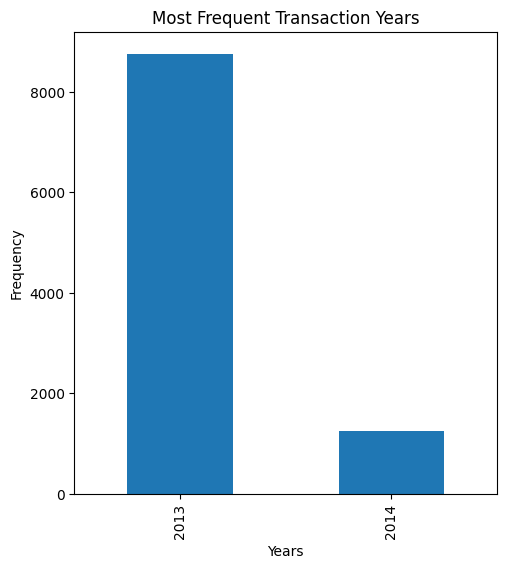

In [25]:
## visualizing the results we have..
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
frequent_years.plot(kind='bar')
plt.title('Most Frequent Transaction Years')
plt.xlabel('Years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

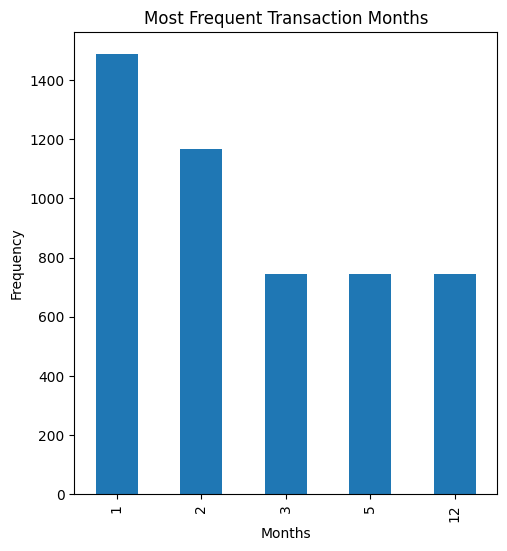

In [26]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
frequent_months.plot(kind='bar')
plt.title('Most Frequent Transaction Months')
plt.xlabel('Months')
plt.ylabel('Frequency')

In [27]:
## How many duplicates transactions exist based on transaction I.D? What steps would you take to remove them,if necessary?

#we have to make our transaction I.D column to align with the column so that it can be added as a column.
fraud.reset_index(inplace=True)



In [28]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  object        
 1   Country                      10000 non-null  object        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  object        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  object        
 6   Industry                     10000 non-null  object        
 7   Destination Country          10000 non-null  object        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  object        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

In [29]:
fraud.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
0,TX0000000001,brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1
1,TX0000000002,china,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1
2,TX0000000003,uk,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1
3,TX0000000004,uae,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1
4,TX0000000005,south africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1


In [30]:
duplicate_ids=fraud['Transaction ID'].duplicated().sum()
print(f"Sum of duplicate Transaction IDs: {duplicate_ids}") ##we have no duplicates in the Transaction ID

Sum of duplicate Transaction IDs: 0


In [31]:
## Perform frequent counts of categorical columns such as transaction type and industry.Are there any value that occur unusually often or rarely?
transaction_type_count=fraud['Transaction Type'].value_counts()
print("Transaction Type Counts:")
print(transaction_type_count)

Transaction Type Counts:
Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64


In [32]:
Industry_count=fraud['Industry'].value_counts()
print("Industry Counts:")
print(Industry_count)

Industry Counts:
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64


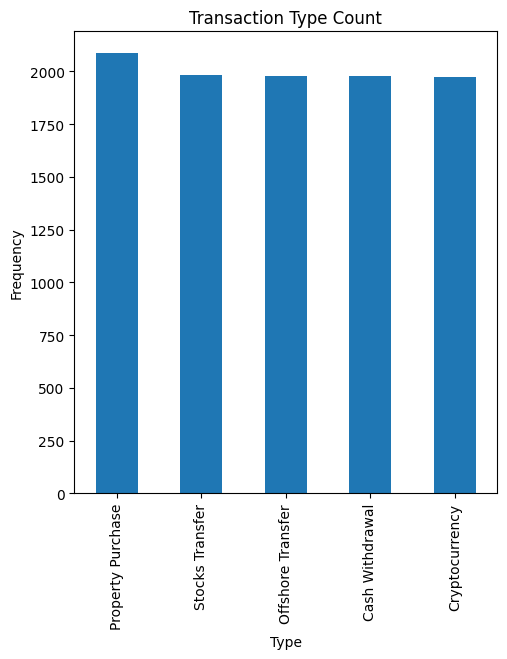

In [33]:
##visualizing the result...
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
transaction_type_count.plot(kind='bar')
plt.title('Transaction Type Count')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

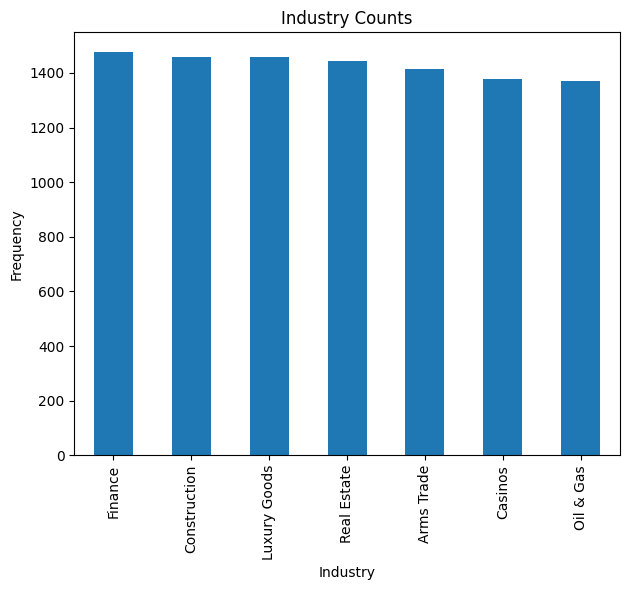

In [34]:
## visualizing the results we have..
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Industry_count.plot(kind='bar')
plt.title('Industry Counts')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [35]:
transct_type_freq=fraud['Transaction Type'].value_counts(normalize=True)
industry_freq=fraud['Industry'].value_counts(normalize=True)
print("Unusual Frequent Transaction Type:")
print(transct_type_freq.nlargest(5))
print("\nUnusual Frequent Industry:")
print(industry_freq.nlargest(5))

Unusual Frequent Transaction Type:
Transaction Type
Property Purchase    0.2086
Stocks Transfer      0.1983
Offshore Transfer    0.1980
Cash Withdrawal      0.1978
Cryptocurrency       0.1973
Name: proportion, dtype: float64

Unusual Frequent Industry:
Industry
Finance         0.1475
Construction    0.1460
Luxury Goods    0.1459
Real Estate     0.1443
Arms Trade      0.1414
Name: proportion, dtype: float64


In [36]:
## Identifying unusual rare occuring values
print("Unusual Rare Transaction Type:")
print(transct_type_freq.nsmallest(5))
print("\nUnusual Rare Industries:")
print(industry_freq.nsmallest(5))

Unusual Rare Transaction Type:
Transaction Type
Cryptocurrency       0.1973
Cash Withdrawal      0.1978
Offshore Transfer    0.1980
Stocks Transfer      0.1983
Property Purchase    0.2086
Name: proportion, dtype: float64

Unusual Rare Industries:
Industry
Oil & Gas       0.1372
Casinos         0.1377
Arms Trade      0.1414
Real Estate     0.1443
Luxury Goods    0.1459
Name: proportion, dtype: float64


In [37]:
## Identify and handle any invalid or out-of-range values in the shell companies involved in the column. What percentage of transactions involve shell companies?
print("Missing Values:")
print(fraud['Shell Companies Involved'].isnull().sum())#checking for missing values



Missing Values:
0


In [38]:
#checking for invalid values..
print("\nInvalid Values:")
print(fraud['Shell Companies Involved'][~fraud['Shell Companies Involved'].apply(lambda x: isinstance(x,(int,str)))])


Invalid Values:
Series([], Name: Shell Companies Involved, dtype: int64)


In [39]:
##Handle invalid values(replace it with NaN)
fraud['Shell Companies Involved']=pd.to_numeric(fraud['Shell Companies Involved'],errors='coerce')

In [40]:
##Check for Out-Of-Range
print("\nOut-Of-Range Values:")
print(fraud['Shell Companies Involved'][(fraud['Shell Companies Involved']<0)|(fraud['Shell Companies Involved']%1 !=0)])


Out-Of-Range Values:
Series([], Name: Shell Companies Involved, dtype: int64)


In [41]:
## Handle out-of-range values
fraud['Shell Companies Involved']=fraud['Shell Companies Involved'].clip(lower=0)

In [42]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  object        
 1   Country                      10000 non-null  object        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  object        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  object        
 6   Industry                     10000 non-null  object        
 7   Destination Country          10000 non-null  object        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  object        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

In [43]:
fraud.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
0,TX0000000001,brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1
1,TX0000000002,china,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1
2,TX0000000003,uk,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1
3,TX0000000004,uae,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1
4,TX0000000005,south africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1


In [44]:
##create a new column to categorize Amount(USD) into bins(e.g low,medium,high).How many transaction fall into each category?
fraud['Amount (USD)'].describe()

count    1.000000e+04
mean     2.501818e+06
std      1.424364e+06
min      1.003180e+04
25%      1.279005e+06
50%      2.501310e+06
75%      3.722416e+06
max      4.999812e+06
Name: Amount (USD), dtype: float64

In [45]:
## I want to round up the Amount (USD) column into integer places for more efficient values
to_integer=fraud['Amount (USD)']=fraud['Amount (USD)'].round(0).astype(int)
to_integer



0       3267530
1       4965767
2         94168
3        386420
4        643378
         ...   
9995    2209229
9996    4800338
9997     489195
9998    2233581
9999     384678
Name: Amount (USD), Length: 10000, dtype: int64

In [46]:
fraud.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day
0,TX0000000001,brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1
1,TX0000000002,china,4965767,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1
2,TX0000000003,uk,94168,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1
3,TX0000000004,uae,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1
4,TX0000000005,south africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1


In [47]:
fraud['Amount (USD)'].value_counts()


Amount (USD)
2655927    3
347853     2
3693961    2
2205833    2
1661930    2
          ..
3845249    1
4503617    1
995315     1
3370227    1
4105025    1
Name: count, Length: 9974, dtype: int64

In [48]:
fraud['Amount (USD)'].min()

np.int64(10032)

In [49]:
fraud['Amount (USD)'].max()

np.int64(4999812)

In [50]:
def categorize_amount(amount):
    if amount < 1000000:
        return "Low"
    elif amount < 2500000:
        return 'Medium'
    else:
        return 'High'
fraud['Amount Category'] = fraud['Amount (USD)'].apply(categorize_amount) 
fraud.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category
0,TX0000000001,brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1,High
1,TX0000000002,china,4965767,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1,High
2,TX0000000003,uk,94168,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1,Low
3,TX0000000004,uae,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1,Low
4,TX0000000005,south africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1,Low


In [51]:
##how many transactions fall into this category?
number_of_transaction=fraud['Amount Category'].value_counts()
number_of_transaction


Amount Category
High      5004
Medium    3076
Low       1920
Name: count, dtype: int64

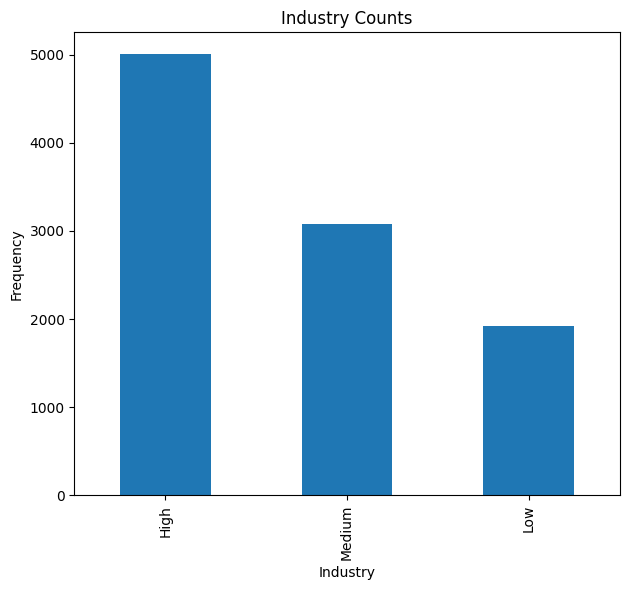

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
number_of_transaction.plot(kind='bar')
plt.title('Industry Counts')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [53]:
## Calculate the total number of transaction for each person involved.What are the descriptive statistics(mean,median,max)for transaction count per person?
fraud['Person Involved'].describe()

count           10000
unique           6320
top       Person_7230
freq                7
Name: Person Involved, dtype: object

In [54]:
## to perform operation on person involved we need to handle the column by seperating the text from the numbers
import re
fraud['Person_Involved']=fraud['Person Involved'].str.extract(r'(\d+)')

In [55]:
fraud.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Person_Involved
0,TX0000000001,brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1,High,1101
1,TX0000000002,china,4965767,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1,High,7484
2,TX0000000003,uk,94168,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1,Low,3655
3,TX0000000004,uae,386420,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1,Low,3226
4,TX0000000005,south africa,643378,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1,Low,7975


In [56]:
fraud.drop(columns='Person Involved') ## Here we have to drop the column we just modified that contains string_numeric so that we can perform our calculations

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Person_Involved
0,TX0000000001,brazil,3267530,Offshore Transfer,2013-01-01 00:00:00,Construction,usa,True,Illegal,6,1,Bank_40,Singapore,2013,1,1,High,1101
1,TX0000000002,china,4965767,Stocks Transfer,2013-01-01 01:00:00,Luxury Goods,south africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1,High,7484
2,TX0000000003,uk,94168,Stocks Transfer,2013-01-01 02:00:00,Construction,switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1,Low,3655
3,TX0000000004,uae,386420,Cash Withdrawal,2013-01-01 03:00:00,Oil & Gas,russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1,Low,3226
4,TX0000000005,south africa,643378,Cryptocurrency,2013-01-01 04:00:00,Real Estate,usa,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1,Low,7975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,singapore,2209229,Offshore Transfer,2014-02-21 11:00:00,Real Estate,brazil,False,Illegal,4,4,Bank_258,Luxembourg,2014,2,21,Medium,6896
9996,TX0000009997,uae,4800338,Property Purchase,2014-02-21 12:00:00,Luxury Goods,russia,False,Legal,10,2,Bank_449,Luxembourg,2014,2,21,High,6348
9997,TX0000009998,uk,489195,Stocks Transfer,2014-02-21 13:00:00,Oil & Gas,russia,False,Illegal,5,0,Bank_156,Cayman Islands,2014,2,21,Low,4171
9998,TX0000009999,brazil,2233581,Offshore Transfer,2014-02-21 14:00:00,Real Estate,russia,True,Illegal,10,5,Bank_12,Singapore,2014,2,21,Medium,2799


In [57]:
## now lets convert the column we just created from string to numeric for easy calculation,if we dont do that we cannot perform calculation on that
# so therefore...
fraud['Person_Involved']=pd.to_numeric(fraud['Person_Involved'])

In [58]:
fraud['Person_Involved'].dtype ##now we have the column datatype as int,we can now calculate our mean,median,max

dtype('int64')

In [59]:
##To calculate the total number of transactions for each person involved...
num_of_transaction=fraud['Person_Involved'].value_counts().reset_index()
num_of_transaction

,Person_Involved,count
0,7230,7
1,6424,7
2,7279,6
3,2625,6
4,3310,6
...,...,...
6315,229,1
6316,4276,1
6317,2324,1
6318,5580,1


In [60]:
num_of_transaction=num_of_transaction.rename(columns={'Person_Involved':'Person','Index':'Total Transaction'})
num_of_transaction

,Person,count
0,7230,7
1,6424,7
2,7279,6
3,2625,6
4,3310,6
...,...,...
6315,229,1
6316,4276,1
6317,2324,1
6318,5580,1


In [61]:
person_involved_mean=fraud['Person_Involved'].mean()
person_involved_mean

np.float64(5001.911)

In [62]:
person_involved_median=fraud['Person_Involved'].median()
person_involved_median

np.float64(5004.0)

In [63]:
person_involved_max=fraud['Person_Involved'].max()
person_involved_max

np.int64(9999)

In [64]:
##create a feature representing the transaction time difference between consecutive transaction for each person.What are the average and median time difference?
sort=fraud.sort_values(by=['Person_Involved','Date of Transaction'])
sort

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Person_Involved
226,TX0000000227,singapore,3746944,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,usa,False,Legal,9,5,Bank_200,Luxembourg,2013,1,10,High,1
478,TX0000000479,uk,1683260,Cryptocurrency,2013-01-20 22:00:00,Person_2,Real Estate,uae,False,Illegal,9,3,Bank_303,Singapore,2013,1,20,Medium,2
9029,TX0000009030,uk,1207151,Property Purchase,2014-01-12 05:00:00,Person_3,Casinos,uk,False,Illegal,6,8,Bank_99,Luxembourg,2014,1,12,Medium,3
23,TX0000000024,uk,2556051,Cash Withdrawal,2013-01-01 23:00:00,Person_5,Casinos,singapore,False,Illegal,8,5,Bank_490,Luxembourg,2013,1,1,High,5
7883,TX0000007884,brazil,4402629,Offshore Transfer,2013-11-25 11:00:00,Person_5,Construction,india,False,Illegal,6,4,Bank_5,Panama,2013,11,25,High,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,TX0000004014,singapore,2600608,Cash Withdrawal,2013-06-17 05:00:00,Person_9995,Luxury Goods,china,False,Illegal,8,0,Bank_29,Singapore,2013,6,17,High,9995
9983,TX0000009984,usa,4105025,Cryptocurrency,2014-02-20 23:00:00,Person_9995,Construction,brazil,True,Legal,5,5,Bank_284,Bahamas,2014,2,20,High,9995
2997,TX0000002998,switzerland,2727573,Offshore Transfer,2013-05-05 21:00:00,Person_9998,Luxury Goods,china,False,Illegal,2,3,Bank_254,Singapore,2013,5,5,High,9998
4672,TX0000004673,uk,959664,Stocks Transfer,2013-07-14 16:00:00,Person_9998,Casinos,uk,True,Illegal,2,7,Bank_450,Luxembourg,2013,7,14,Low,9998


In [65]:
fraud['Transaction Time Diff']=fraud.groupby('Person_Involved')['Date of Transaction'].diff() #transaction time difference
fraud.tail()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction Year,Transaction Month,Transaction Day,Amount Category,Person_Involved,Transaction Time Diff
9995,TX0000009996,singapore,2209229,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,brazil,False,Illegal,4,4,Bank_258,Luxembourg,2014,2,21,Medium,6896,9 days 11:00:00
9996,TX0000009997,uae,4800338,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,russia,False,Legal,10,2,Bank_449,Luxembourg,2014,2,21,High,6348,NaT
9997,TX0000009998,uk,489195,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,russia,False,Illegal,5,0,Bank_156,Cayman Islands,2014,2,21,Low,4171,NaT
9998,TX0000009999,brazil,2233581,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,russia,True,Illegal,10,5,Bank_12,Singapore,2014,2,21,Medium,2799,15 days 16:00:00
9999,TX0000010000,switzerland,384678,Stocks Transfer,2014-02-21 15:00:00,Person_3267,Arms Trade,china,True,Legal,5,4,Bank_22,Panama,2014,2,21,Low,3267,NaT


In [66]:
fraud['Transaction Time Diff'].mean() ##Average time difference

Timedelta('118 days 14:43:54.456521740')

In [67]:
fraud['Transaction Time Diff'].median() ##Median time difference

Timedelta('98 days 04:00:00')

In [68]:
##How many transactions involve Tax Heaven Countries? Calculate the proportion of transactions going to these countries
num_of_transaction=fraud.groupby('Transaction Type')['Tax Haven Country'].value_counts()
num_of_transaction


Transaction Type   Tax Haven Country
Cash Withdrawal    Bahamas              364
                   Switzerland          342
                   Singapore            338
                   Panama               327
                   Cayman Islands       306
                   Luxembourg           301
Cryptocurrency     Panama               392
                   Cayman Islands       356
                   Luxembourg           325
                   Switzerland          320
                   Bahamas              298
                   Singapore            282
Offshore Transfer  Singapore            352
                   Panama               342
                   Cayman Islands       335
                   Bahamas              325
                   Luxembourg           318
                   Switzerland          308
Property Purchase  Luxembourg           366
                   Cayman Islands       359
                   Switzerland          347
                   Singapore           

In [69]:
fraud['Transaction Type'].describe()

count                 10000
unique                    5
top       Property Purchase
freq                   2086
Name: Transaction Type, dtype: object

In [70]:
fraud['Tax Haven Country'].describe()

count      10000
unique         6
top       Panama
freq        1743
Name: Tax Haven Country, dtype: object

In [71]:
proportion=fraud.groupby('Tax Haven Country')['Transaction Type'].value_counts()
proportion

Tax Haven Country  Transaction Type 
Bahamas            Cash Withdrawal      364
                   Property Purchase    329
                   Offshore Transfer    325
                   Stocks Transfer      312
                   Cryptocurrency       298
Cayman Islands     Property Purchase    359
                   Cryptocurrency       356
                   Offshore Transfer    335
                   Stocks Transfer      320
                   Cash Withdrawal      306
Luxembourg         Stocks Transfer      371
                   Property Purchase    366
                   Cryptocurrency       325
                   Offshore Transfer    318
                   Cash Withdrawal      301
Panama             Cryptocurrency       392
                   Stocks Transfer      343
                   Offshore Transfer    342
                   Property Purchase    339
                   Cash Withdrawal      327
Singapore          Offshore Transfer    352
                   Property Purchase   

In [72]:
##Create new feature called Risk Index that combines Money Laundering Risk Score and the number of Shell Companies Involved.What is the range and the average... 
# of this index.
def calculate_risk_index(row):
    shell_company_factor=1+row['Shell Companies Involved'] * 0.5
    if row['Shell Companies Involved']>5:
        shell_company_factor*=2
    return row['Money Laundering Risk Score']* shell_company_factor
fraud['Risk Index']=fraud.apply(calculate_risk_index, axis=1)


In [73]:
## What is the Range and Average of this index?
maximum_index_value=fraud['Risk Index'].max()
maximum_index_value

np.float64(110.0)

In [74]:
minimum_index_value=fraud['Risk Index'].min()
minimum_index_value

np.float64(1.0)

In [75]:
range=maximum_index_value-minimum_index_value
range

np.float64(109.0)

In [76]:
Average_index=fraud['Risk Index'].mean()
Average_index

np.float64(28.08895)

In [77]:
##Calculate the Average Money Laundering Risk Score for each Industry.What are the industries with the highest average risk?
Avr_Money_laundry_rskscore=fraud.groupby('Industry')['Money Laundering Risk Score'].mean().nlargest(6)
Avr_Money_laundry_rskscore

Industry
Finance         5.711864
Construction    5.583562
Arms Trade      5.570721
Casinos         5.556282
Real Estate     5.455301
Oil & Gas       5.427843
Name: Money Laundering Risk Score, dtype: float64

In [78]:
##Create a binary flag to indicate High-Risk Transaction where the money Laundering Risk Score is greater than 7 and more than 2 Shell Companies are involved,

#How many transactions meet this criteria?
##Extract the year from Date of Transaction column and calculate the number of transaction per year.What is the trend in transaction volume over the years?